# <center> Image as data: A brief introduction </center>

## <center> ACE 592 </center>


## Image Data
Image data is our second example of __unstructured data__. 

For example, a picture of my cat Sparky:
<center> <img src="sparky.jpg" width=250> </center>

There are no rows, columns, or values. __So how do we do analysis?__

As economists, we might be more familiar with some examples of image analysis:
- Using nightlights as a proxy for "economic activity."
- Feature identification using satelite images.
- Incorporating rainfall as an instrument.

All of these depend on the use of images. Before getting into these, its useful to go over what the heck images even are.

### What are images?
<center> <img src="sparky.jpg" width=250> </center>

This picture is:
- A three dimensional array of pixels (since it is in color).
- A sequence of pixels my brain maps to the concept "cat" and also "Sparky."


Computers __only see it the first way,__ whereas __our brains see it the second way__.

In essence, we need to engineer our code to see the image as the second thing rather than just the first.

How do we teach a computer to understand what an image is?

## How Python sees an image

We will here use the pillow library


In [1]:
import numpy as np
from PIL import Image

sparky = Image.open("sparky.jpg")

sparky_array = np.array(sparky)

sparky_array.shape

(2100, 1575, 3)

What are those other dimensions?

Color images are made up of three channels: Red, Green, and Blue. The values in these arrays represent the intensity of red, green, and blue. Together these three can make up any color.

The plotting package "imshow" can plot an array.

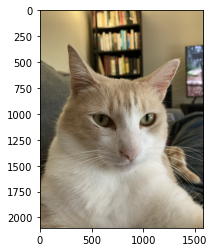

In [2]:
import matplotlib.pyplot as plt
plt.imshow(sparky_array[:,:,:])

Can slice an image just like an array.

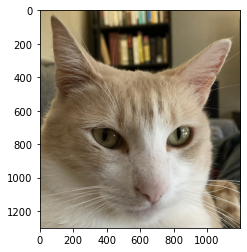

In [3]:
plt.imshow(sparky_array[300:1600,200:1400,:])

Can show what each channel color would look like using "cmap" argument.

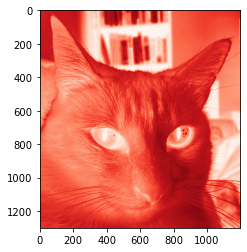

In [4]:
plt.imshow(sparky_array[300:1600,200:1400,0],cmap="Reds")

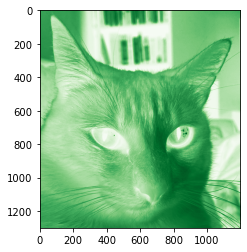

In [5]:
plt.imshow(sparky_array[300:1600,200:1400,1],cmap="Greens")

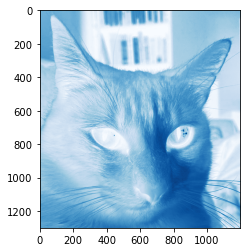

In [6]:
plt.imshow(sparky_array[300:1600,200:1400,2],cmap="Blues")

RGBA images have a fourth axis for the alpha parameter

(2100, 1575, 4)


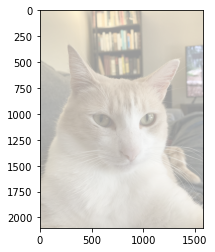

In [16]:
alpha = np.ones(list(sparky_array.shape[:2]))*100
sparky_rbga = np.dstack([sparky_array,alpha])
print(sparky_rbga.shape)
plt.imshow(sparky_rbga.astype(int)[:,:,:]);

#### What did this code do?

### High dimensional concatenation
The original third axis was only size three; however, I made a new 2d array for the alpha parameter and needed to concatenate on a new dimension.

To do this, I used the function `dstack` which specifically stacks on the third axis.

To do this using `concatenate`, I would have had to make the 2d array a 3d array of size (N,M,1) and then feed it the keyword "axis=2":

(2100, 1575, 4)


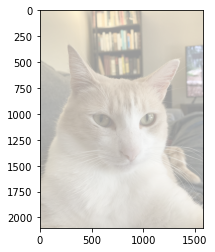

In [17]:
alpha = np.ones(list(sparky_array.shape[:2]))*100

sparky_rbga = np.concatenate([sparky_array,alpha[:,:,np.newaxis]],axis=2)

print(sparky_rbga.shape)
plt.imshow(sparky_rbga.astype(int)[:,:,:])

Another, fancier example:

(2100, 1575, 4)


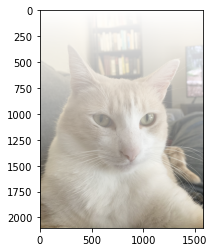

In [18]:
sparky_array_size = sparky_array[:,:,0].size
sparky_array_shape = sparky_array.shape[:2]
alpha = np.arange(1,sparky_array_size+1).reshape(sparky_array_shape)
alpha = alpha/(sparky_array_size/254)
sparky_rbga = np.dstack([sparky_array,alpha])
print(sparky_rbga.shape)
plt.imshow(sparky_rbga.astype(int))

### When do we use this kind of concatenation?
We will see that they often come in handy with images, since the real number line cannot always represent all the data we want. For that reason, we need a third dimension (or even higher than that!). We will see this is used in the case of rasters where there are multiple "bands."

### One non-image example: transition matrices

In one example I programmed, I had more than two state variables for a recursive dynamic problem. What is the transition matrix look like for more than two states?

The transition matrix has __as many dimensions as there are states__.

By doing strategic array multiplication you can vectorize even that operation using high-dimensional arrays.

### Image histograms.

We can look at histograms of images by flattening the array with the function `ravel`

In [19]:
sparky_array[:,:,0].ravel()

array([174, 176, 177, ..., 158, 158, 157], dtype=uint8)

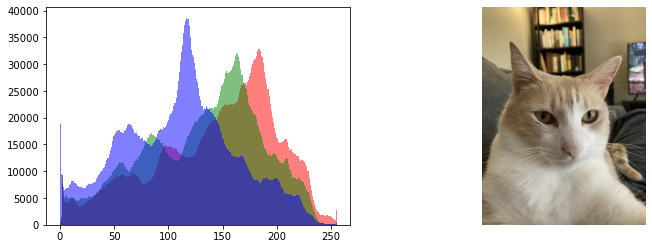

In [20]:
f,a = plt.subplots(1,2,figsize=(12,4))
a[0].hist(sparky_array[:,:,0].ravel(),bins=256,color="red",alpha=.5);
a[0].hist(sparky_array[:,:,1].ravel(),bins=256,color="green",alpha=.5);
a[0].hist(sparky_array[:,:,2].ravel(),bins=256,color="blue",alpha=.5);
a[1].imshow(sparky_array[:,:,:])
a[1].axis('off');

A popular combination appears to be something like (150,150,150):

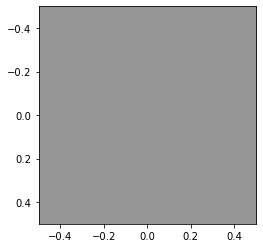

In [21]:
plt.imshow([[(150 / 255, 150 / 255, 150 / 255)]])

In grayscale:

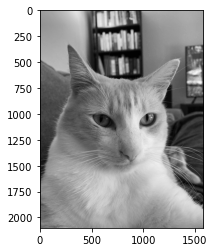

In [28]:
sparky_gray = Image.open('sparky.jpg').convert('L')
sparky_gray_array = np.array(sparky_gray)
plt.imshow(sparky_gray_array[:,:],cmap="gray")

How poignant and dignified...

Niftily enough, inverting this image is as simple as this math operation:

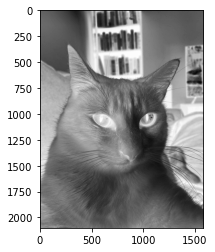

In [29]:
sparky_gray_array_inv = 255-sparky_gray_array
plt.imshow(sparky_gray_array_inv,cmap="gray")

What does the histogram look like?

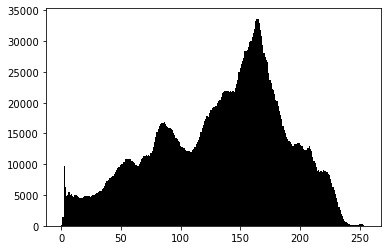

In [30]:
plt.hist(sparky_gray_array.ravel(),bins=256,color="black");

## Basics of Masking
What is masking?

This is a basic array operation that usually uses booleans. For example, here is a boolean image I made:

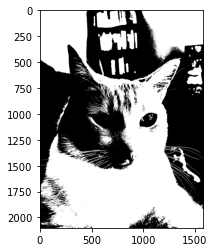

In [35]:
mask = sparky_gray_array>133
plt.imshow(mask,cmap="gray")

__What did this code do?__

What I did above is referred to as "threshholding," and is sometimes a preprocessing step before looking at images.

In this case, feeding binary arrays into `imshow` translates it into black (False) and white (True).

If I wanted to, I could simply color anything below the threshhold as black.

I can do this using a mask:

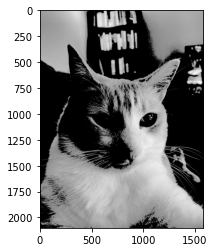

In [43]:
mask = sparky_gray_array<130
mask_array = sparky_gray_array.copy()
mask_array[mask] = 0
plt.imshow(mask_array,cmap="gray")

### Another Masking Example

The package `skimage` can be used to draw objects in arrays. If we make masks out of these arrays, we can essentially subset images.

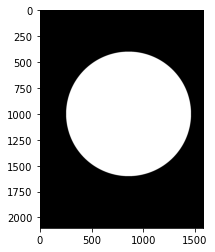

In [45]:
from skimage.draw import circle
rr,cc = circle(1000,850,600,shape = sparky_gray_array.shape)
mask = np.zeros(sparky_gray_array.shape, dtype=bool)
mask[rr,cc]= 1
plt.imshow(mask,cmap="gray")

Text(280, 250, "That's all, folks!")

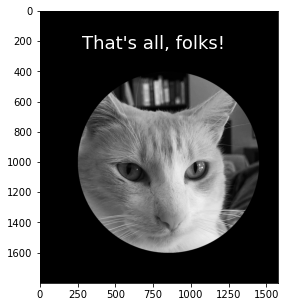

In [46]:
sparky_circle = sparky_gray_array.copy()
sparky_circle[mask != 1] =0

f,a = plt.subplots(figsize=(10,5))
a.imshow(sparky_circle[:-300,:],cmap="gray")
a.annotate("That's all, folks!",(280,250),color='white',fontsize=18)

## Side note: why is threshholding necessary?

Example based on [this tutorial](https://datacarpentry.org/image-processing/07-thresholding/)

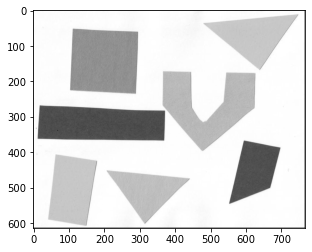

In [47]:
shapes = np.array(Image.open('shapes.jpg').convert('L'))

plt.imshow(shapes,cmap="gray")

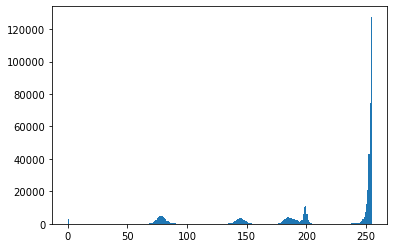

In [48]:
plt.hist(shapes.ravel(),bins=250);

What does this histogram tell us?

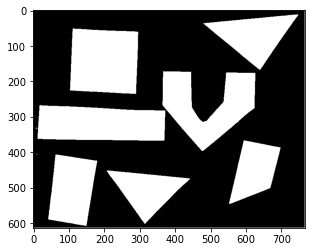

In [56]:
plt.imshow(shapes<225,cmap='gray')

There are algorithms that can be used to detect the "optimal" threshhold point for finding objects in images.

After doing this step, we could do an edge detection algorithm to find figure out where the images are and maybe take measurements.

### Feature identification

But what about our picture of Sparky? There does not seem to a threshhold that makes sense...

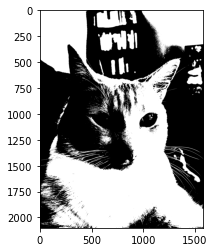

In [66]:
plt.imshow(sparky_gray_array>=140,cmap="gray")

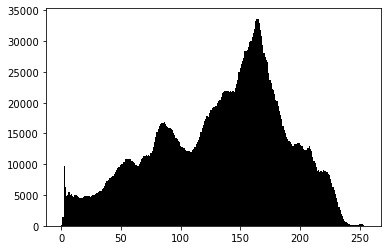

In [57]:
plt.hist(sparky_gray_array.ravel(),bins=256,color="black");

This is where `skimage`, an image processing package, can help us. 

This algorithm attempts to find the "optimal" threshhold over which to make an image.

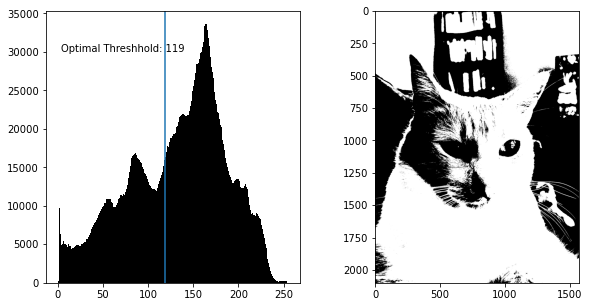

In [67]:
from skimage.filters import threshold_otsu

f,a = plt.subplots(1,2,figsize=(10,5))
thresh = threshold_otsu(sparky_gray_array)
a[0].hist(sparky_gray_array.ravel(),bins=256,color="black");
a[0].axvline(thresh)
a[0].annotate("Optimal Threshhold: {}".format(thresh),(4,30000))

mask = sparky_gray_array<thresh
a[1].imshow(mask,cmap="Greys")


Would I be able to find the objects in this photo?

Let's find out by applying an "edge detection" algorithm we can use in `scikit-images.`

Text(0.5, 1.0, 'Binary Image')

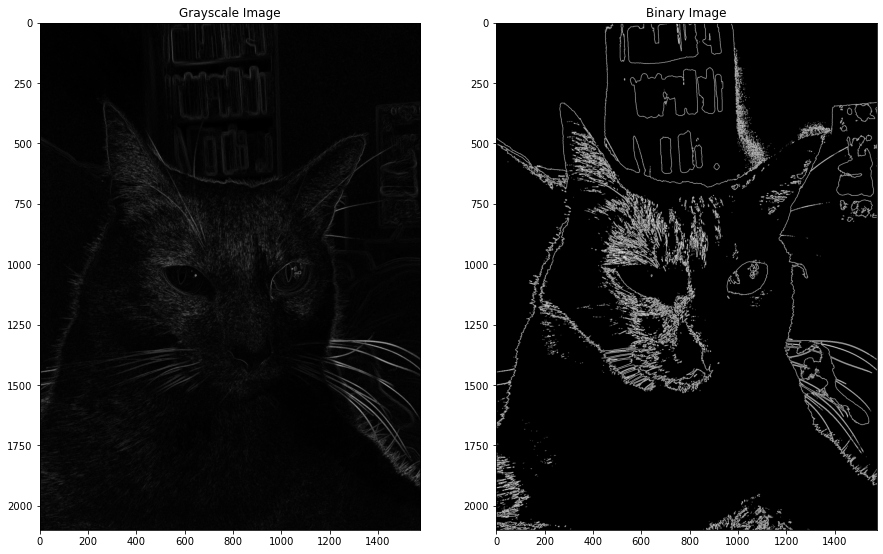

In [68]:
from skimage import filters

f,a = plt.subplots(1,2,figsize=(15,10))
a[0].imshow(filters.sobel(sparky_gray_array),cmap="gray")
a[0].set_title("Grayscale Image")
a[1].imshow(filters.sobel(mask),cmap="gray")
a[1].set_title("Binary Image")


### How does edge detection work?

Essentially, most algorithms look at changes in pixel values across both the x-axis and y-axis. They also tend to look at the direction and magnitude of the change. 

Text(0.5, 1.0, 'Edge Detection Image')

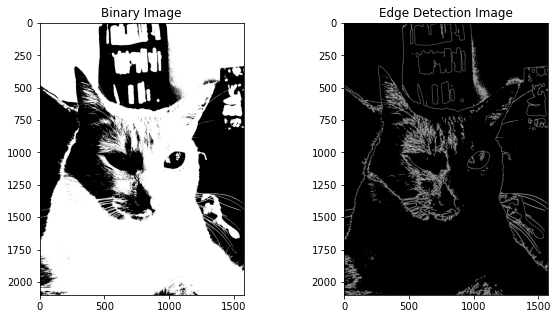

In [70]:
f,a = plt.subplots(1,2,figsize=(10,5))
a[0].imshow(mask,cmap="Greys")
a[0].set_title("Binary Image")
a[1].imshow(filters.sobel(mask),cmap="gray")
a[1].set_title("Edge Detection Image")

After we "binarized" this image, it could see the gradient changes much easier than before.

## Finding countours
Similar to finding edges is finding contours.

Recall this image:

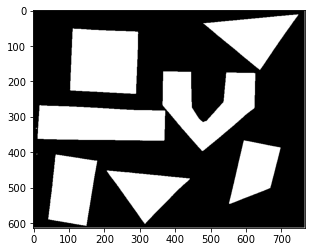

In [72]:
plt.imshow(shapes<220,cmap="gray")

Now let's ask a question: how many objects are in this photo? and how can we teach a computer to do it for us?

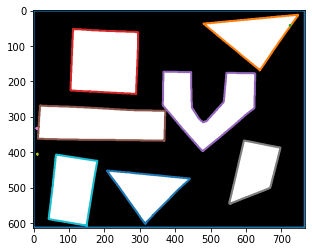

In [73]:
from skimage.measure import find_contours
shape_contours = find_contours(shapes<220,.8)

fig, ax = plt.subplots()
ax.imshow(shapes<220,cmap="gray")

for contour in shape_contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)


__What did this code just do?__

First of all, what is a contour?

In [74]:
shape_contours[3], shape_contours[3].shape

(array([[235.2, 289. ],
        [235.2, 288. ],
        [235.2, 287. ],
        ...,
        [234.2, 290. ],
        [235. , 289.2],
        [235.2, 289. ]]),
 (759, 2))

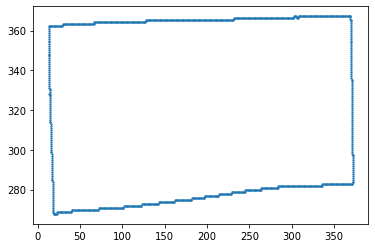

In [76]:
plt.scatter(shape_contours[5][:, 1],shape_contours[5][:, 0],s=1.5)

Essentially, it is a vector of x and y points. The algorithm we used extrapolated a contour from changes in pixels.

Now, about counting objects. How many contours did we extract?

Here is the size and number of all of them.

In [77]:
print("There are {} contours".format(len(shape_contours)))
[x.shape for x in shape_contours]

There are 11 contours


[(2755, 2),
 (853, 2),
 (5, 2),
 (759, 2),
 (1253, 2),
 (925, 2),
 (11, 2),
 (649, 2),
 (11, 2),
 (679, 2),
 (769, 2)]

Which of these are what we want to count?

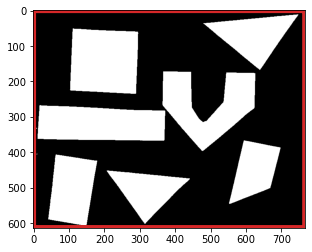

In [78]:
fig, ax = plt.subplots()
ax.imshow(shapes<220,cmap="gray")
ax.plot(shape_contours[0][:, 1], shape_contours[0][:, 0], linewidth=5,color="C3")

So the first big one is just the boundary of the image.

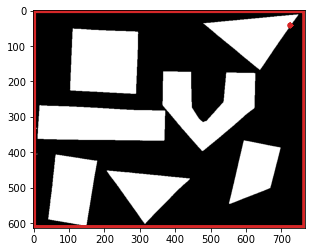

In [79]:
fig, ax = plt.subplots()
ax.imshow(shapes<220,cmap="gray")
ax.plot(shape_contours[0][:, 1], shape_contours[0][:, 0], linewidth=5,color="C3")
ax.plot(shape_contours[2][:, 1], shape_contours[2][:, 0], linewidth=5,color="C3")

It also found  very small contour, likely some noise.

In [80]:
actual_shapes = [x for x in shape_contours if (x.shape[0]>11)&(x.shape[0]<2755)]

len(actual_shapes)

7

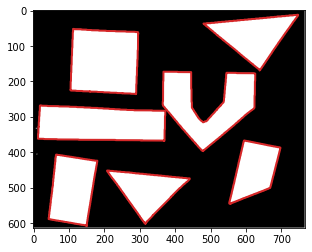

In [81]:
fig, ax = plt.subplots()
ax.imshow(shapes<220,cmap="gray")

for contour in actual_shapes:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2,color="C3")

It took some input from us, but it seemed to have done the trick...

### Back to the cat

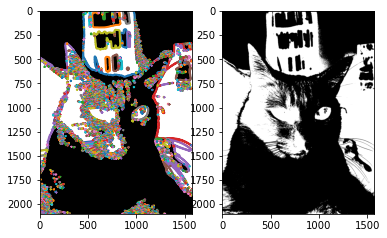

In [82]:
from skimage.measure import find_contours
shape_contours = find_contours(mask,.9)

fig, ax = plt.subplots(1,2)
ax[1].imshow(mask,cmap="gray")
ax[0].imshow(mask,cmap="gray")

for contour in shape_contours:
    ax[0].plot(contour[:, 1], contour[:, 0], linewidth=2)


In [83]:
len(shape_contours)

6269

yikes...

In [84]:
import pandas as pd
pd.Series(contour_size).describe()

NameError: name 'contour_size' is not defined

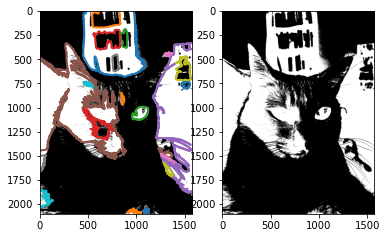

In [85]:
bigger_ones = [x for x in shape_contours if x.shape[0]>500]

fig, ax = plt.subplots(1,2)
ax[1].imshow(mask,cmap="gray")
ax[0].imshow(mask,cmap="gray")

for contour in bigger_ones:
    ax[0].plot(contour[:, 1], contour[:, 0], linewidth=2)


Better, but still very hard to detect any useful objects in this photo...

### Ways to improve object detection:
- Filtering. Recall that it picked up many things that were not actual contours. A __Gaussian filter__ for example may be able to net these pixels out to prevent this behavior.
- Smoothing. Similar to other applications, we may be able to help detection by smoothing out pixel values that are too sharp.

__Most of these we will never touch as economists, but they are useful to know about in case we need them__.

### This is why machine vision is SO hard...
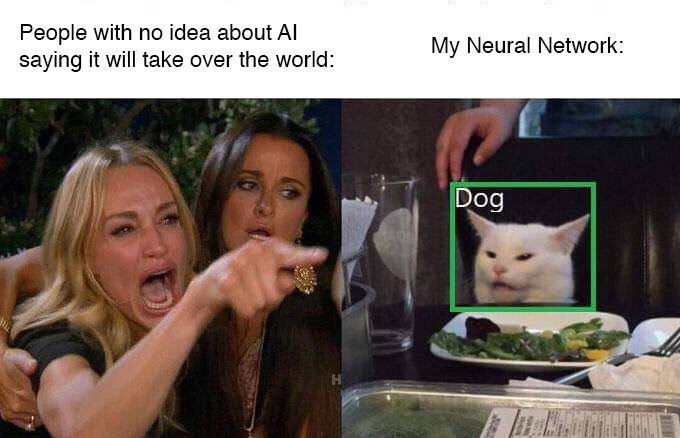


### Very hard...

<center>
<img src="xkcd_comic.png" width="300">
   </center>

### A typical image processing workflow:
- Read image.
- Make grayscale.
- Apply threshholding.
- Run some smoothing/filtering.
- Attempt to detect objects.
- Apply higher order statistics to pixels to find things like __texture__.

After generating those features, they are often used for some kind of machine learning prediction algorithm.

### The challenge could be telling a computer these are different things.
<center>
<img src="fox.jpg" width=250><img src="sparky.jpg" width=250> 
</center>

## Feature Generation in Images
__What are some examples?__

- Objects (contours, shapes).
- Pixel moments (count, mean, stdev, etc.).
- Pixel values within objects.
- Line distances between points.

and so forth.